--- Initial Data Exploration ---
Head of the dataset:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

Shape of the dataset:
(150, 6)

Grouping by Species:
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

Description of the dataset:
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1

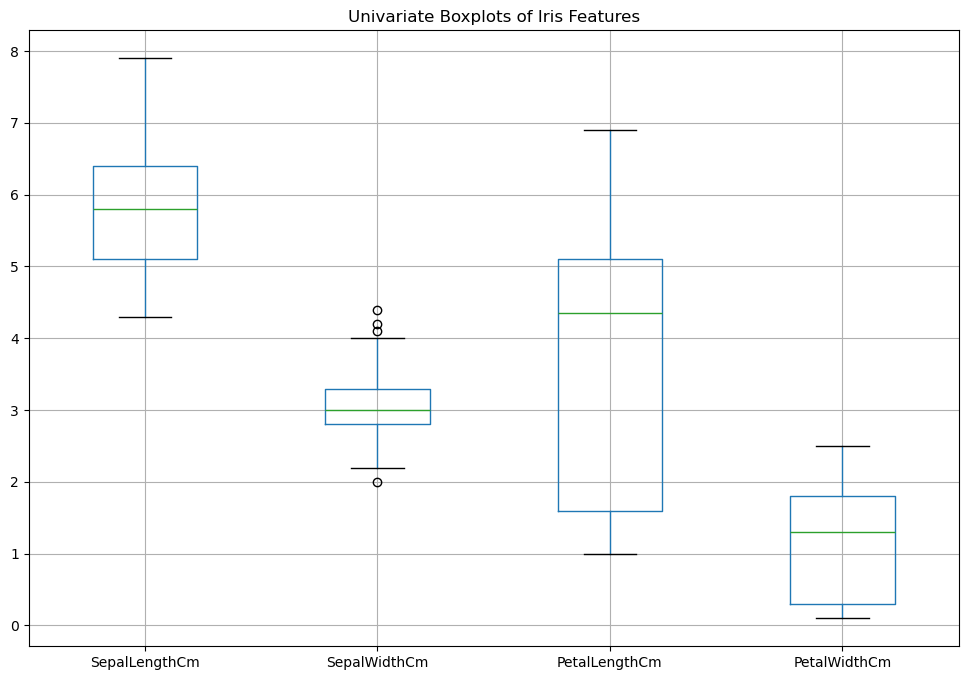

Histogram:


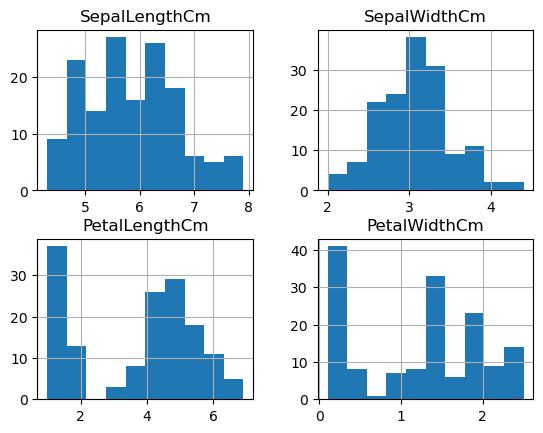

Scatter Matrix


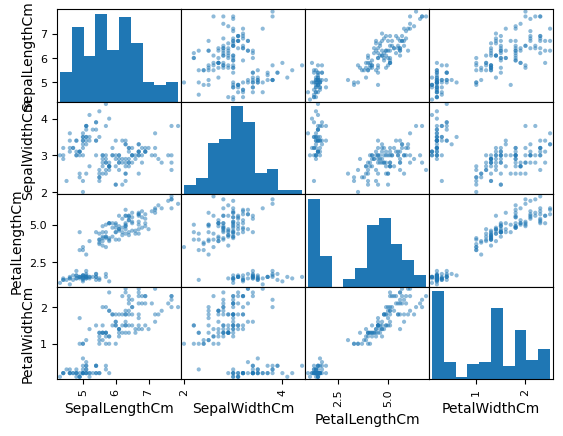


--- Train-Test Split Shapes ---
X_train shape: (120, 4)
X_test shape: (30, 4)
y_train shape: (120,)
y_test shape: (30,)
------------------------------

--- Model Evaluation ---
--- Logistic Regression ---
Accuracy: 1.0000
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

------------------------------
--- Linear Discriminant Analysis ---
Accuracy: 1.0000
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accurac

In [2]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from pandas.plotting import scatter_matrix

#Loading the dataset
df = pd.read_csv('Iris.csv')

#1.Dataset Operations
print("--- Initial Data Exploration ---")
print("Head of the dataset:")
print(df.head())
print("\nShape of the dataset:")
print(df.shape)
print("\nGrouping by Species:")
print(df.groupby('Species').size())
print("\nDescription of the dataset:")
print(df.describe())
print("-" * 30)

# Dropping the 'Id' column as it is not needed for modeling
df = df.drop('Id', axis=1)

#2. Data Visualization
print("\n--- Data Visualization ---")

# Univariate plots (boxplots)
plt.figure(figsize=(12, 8))
df.boxplot()
plt.title('Univariate Boxplots of Iris Features')
plt.show()

#Histogram
print("Histogram:")
df.hist()
plt.show()

#sSatter matrix for multivariate plot
print("Scatter Matrix")
scatter_matrix(df)
plt.show()

#3. Data Preprocessing
# Encode the 'Species' column to numerical labels
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

#4. Train-Test Split
X = df.drop('Species', axis=1)
y = df['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\n--- Train-Test Split Shapes ---")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("-" * 30)


#5. Defining and Evaluating Machine Learning Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Support Vector Machines": SVC()
}

print("\n--- Model Evaluation ---")
for name, model in models.items():
    # Training the model
    model.fit(X_train, y_train)

    # Make predictions
    predictions = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, predictions)
    report = classification_report(y_test, predictions, target_names=le.inverse_transform([0, 1, 2]))

    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(report)
    print("-" * 30)